In [124]:
import geopandas as gpd
import pandas as pd
import os,re,json
import numpy as np
from p_tqdm import p_map
from sklearn.neighbors import KDTree

In [125]:
c11 = gpd.read_file('data/Lower_Layer_Super_Output_Areas_(December_2011)_Population_Weighted_Centroids.csv')
c01 = gpd.read_file('data/Lower_Layer_Super_Output_Areas_(December_2001)_Population_Weighted_Centroids.csv')

In [131]:
# def cart(lat,lon):
#     R = 637800 #earth radius in m
#     x = R * np.cos(lat) * np.cos(lon)
#     y = R * np.cos(lat) * np.sin(lon)
#     z = R * np.sin(lat)
#     return x,y,z

# def get_coord(x):
#     return np.array([cart(*i.xy) for i in x.geometry])[:,:,0]


X11 = c11[['X','Y']].values #
X01 = c01[['X','Y']].values

tree = KDTree(X11,leaf_size=2)  



In [132]:
def dist (j):
    dist, ind = tree.query([j], k=5)                
    return [ind,dist]

    
    
res =  p_map(dist,X01)



  0%|          | 0/34378 [00:00<?, ?it/s]

In [118]:
# res

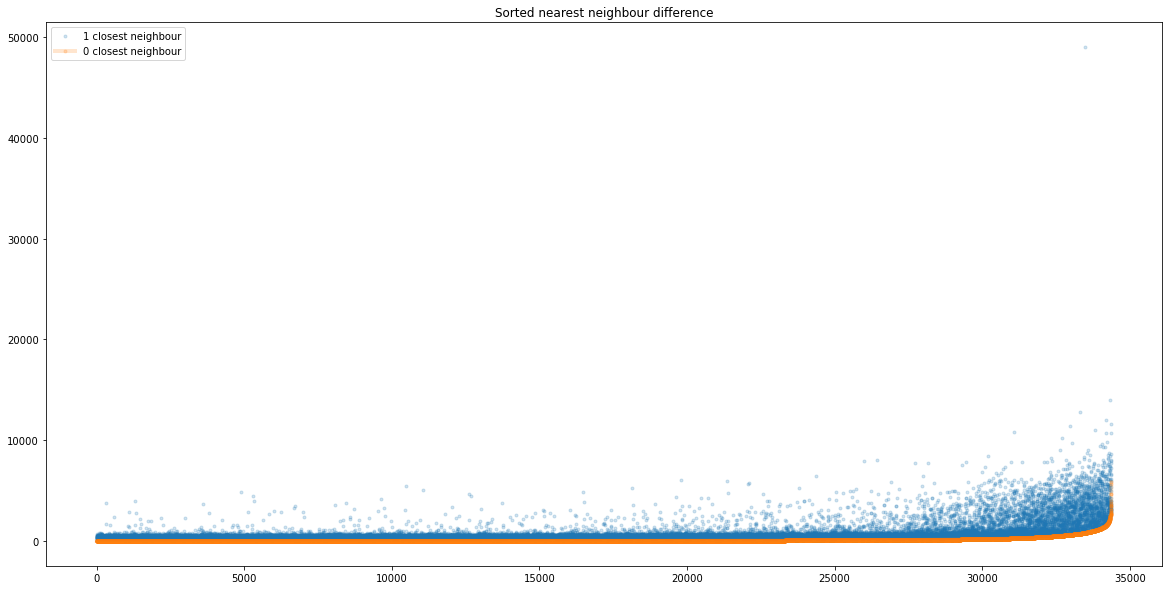

In [139]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

r2 = np.array(sorted(np.array(res)[:,1,0], key=lambda x: x[0], reverse=False))

for i in [1,0]:
    distances = r2[:,i]
#     distances.sort()
    plt.plot(distances,label='%s closest neighbour'%i,lw=4*0**i
             ,marker='.',alpha=.2)
plt.title('Sorted nearest neighbour difference')
plt.legend()
plt.show()

In [147]:
both = set(c11.lsoa11cd) & set(c01.lsoa01cd)
new = set(c11.lsoa11cd) - set(c01.lsoa01cd)
old = set(c01.lsoa01cd) - set(c11.lsoa11cd)
len(both),len(new),len(old),len(c11),len(c01)

(33519, 1234, 859, 34753, 34378)

In [146]:
len(both),len(new),len(old),len(c11),len(c01)

(33519, 1234, 859, 34753, 34378)

In [111]:
np.array(res)[:,0,0,0]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.2429e+04, 3.2452e+04,
       3.2480e+04])

  0%|          | 0/33519 [00:00<?, ?it/s]

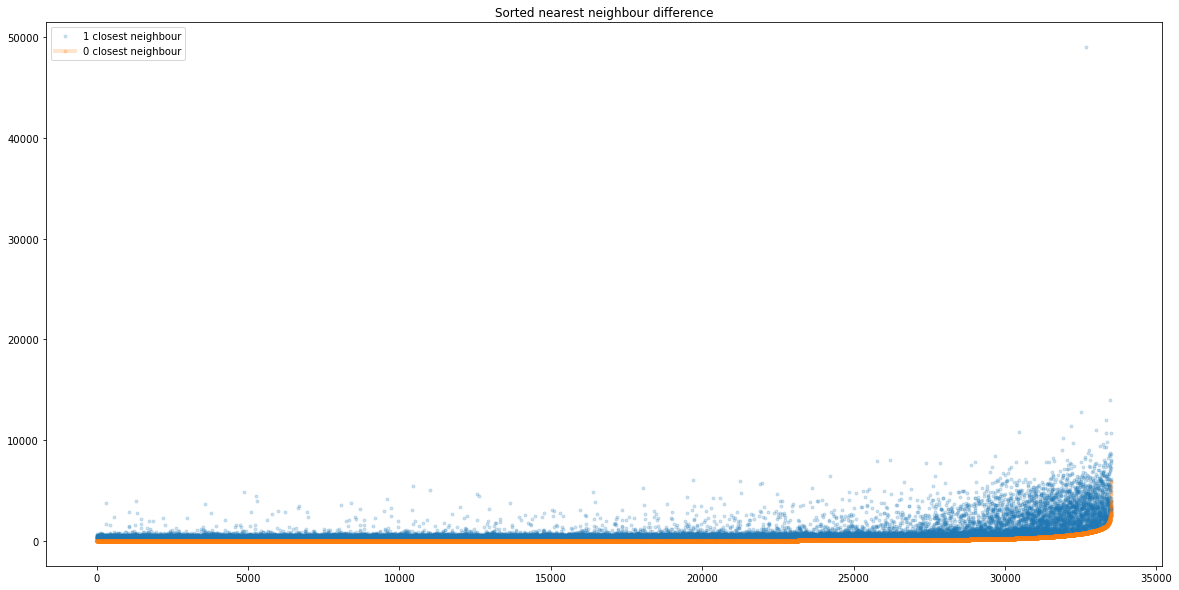

In [150]:
r3 =  p_map(dist,c01[[j in both for j in c01.lsoa01cd]][['X','Y']].values)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

r2 = np.array(sorted(np.array(r3)[:,1,0], key=lambda x: x[0], reverse=False))

for i in [1,0]:
    distances = r2[:,i]
#     distances.sort()
    plt.plot(distances,label='%s closest neighbour'%i,lw=4*0**i
             ,marker='.',alpha=.2)
plt.title('Sorted nearest neighbour difference')
plt.legend()
plt.show()


  0%|          | 0/859 [00:00<?, ?it/s]

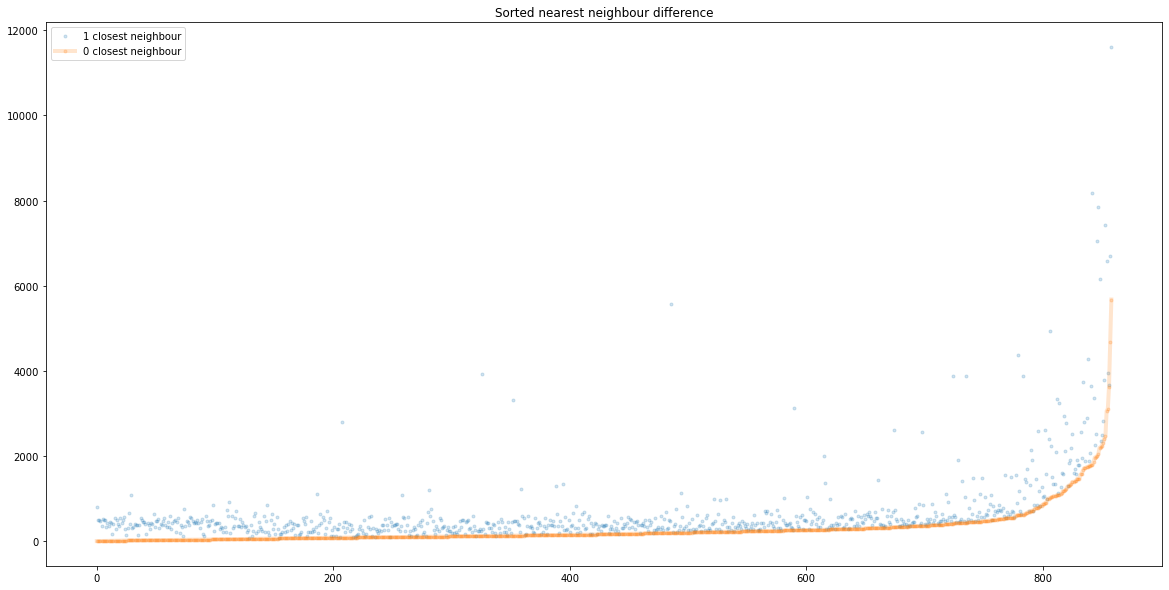

In [152]:
r3 =  p_map(dist,c01[[j in old for j in c01.lsoa01cd]][['X','Y']].values)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

r2 = np.array(sorted(np.array(r3)[:,1,0], key=lambda x: x[0], reverse=False))

for i in [1,0]:
    distances = r2[:,i]
#     distances.sort()
    plt.plot(distances,label='%s closest neighbour'%i,lw=4*0**i
             ,marker='.',alpha=.2)
plt.title('Sorted nearest neighbour difference')
plt.legend()
plt.show()


,objectid,lsoa01cd,lsoa01nm,geometry
0,1,E01000001,City of London 001A,POINT (-0.09624 51.51953)
1,2,E01000002,City of London 001B,POINT (-0.09260 51.51969)
2,3,E01000003,City of London 001C,POINT (-0.09589 51.52203)
3,4,E01000004,City of London 001D,POINT (-0.09755 51.51414)
4,5,E01000005,City of London 001E,POINT (-0.07492 51.51376)


In [122]:
c01.head()

,OBJECTID,OA01CD,OA01CDOLD,geometry
0,1,E00000001,00AAFA0001,POINT (-0.09490 51.52028)
1,2,E00000002,00AAFA0002,POINT (-0.09723 51.51836)
2,3,E00000003,00AAFA0003,POINT (-0.09673 51.51989)
3,4,E00000004,00AAFA0004,POINT (-0.09543 51.51996)
4,5,E00000005,00AAFA0005,POINT (-0.09655 51.51941)


[[40 44 45]] [[1020.30820012 1781.57574803 3313.38610026]]


In [47]:
# trims , leaves, splits
tree.get_tree_stats()


(19, 4, 22)

In [57]:
np.array(tree.node_bounds).shape

(2, 32767, 3)

In [65]:
np.array(tree.node_bounds).shape

(2, 32767, 3)

In [39]:
m01.iloc[1].geometry.distance(m11.iloc[1].geometry
)


448.49010175900776

In [83]:

tree.query([X11[199]], k=3) 



(array([[   0.        , 2894.20973742, 3261.12245578]]),
 array([[199, 200, 198]]))

In [ ]:



Your points are in a lon, lat coordinate system (EPSG:4326 or WGS 84). To calculate a distance in meters, you would need to either use the Great-circle distance or project them in a local coordinate system to approximate the distance with a good precision.

For Sri Lanka, you can use EPSG:5234 and in GeoPandas, you can use the distance function between two GeoDataFrames.